In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [116]:
df = pd.read_csv("Dataset_Hospital_Visits.csv")

Description of the data set

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [118]:
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [119]:
df.head()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,4.738527e+13,5387604,F,2016-02-24T07:53:17Z,2016-05-13T00:00:00Z,NaN,RESISTÊNCIA,no,no,no,no,no,no,No
1,6.557495e+13,5655266,M,2016-05-03T16:29:14Z,2016-05-12T00:00:00Z,4.0,NaN,NaN,NaN,no,no,no,no,No
2,1.265473e+11,5745855,F,2016-05-30T12:54:18Z,2016-05-30T00:00:00Z,19.0,JARDIM DA PENHA,no,no,no,no,no,no,No
3,2.681769e+13,5700247,F,2016-05-16T09:15:51Z,2016-05-16T00:00:00Z,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,No
4,7.813565e+13,5656211,F,2016-05-04T07:46:23Z,2016-05-04T00:00:00Z,0.0,ITARARÉ,NaN,no,no,no,no,no,No


In [120]:
df.tail()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88416,1.454831e+14,5772271,F,2016-06-03T15:01:39Z,2016-06-06T00:00:00Z,32.0,TABUAZEIRO,no,no,no,no,no,no,No
88417,3.257342e+13,5636567,M,2016-04-28T15:38:16Z,2016-05-05T00:00:00Z,7.0,NaN,no,no,no,NaN,no,yes,No
88418,3.888198e+12,5778538,F,2016-06-06T15:46:02Z,2016-06-08T00:00:00Z,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,No
88419,7.854955e+10,5787782,F,2016-06-08T10:35:20Z,2016-06-08T00:00:00Z,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,No
88420,6.581160e+13,5666176,F,2016-05-05T16:05:12Z,2016-05-10T00:00:00Z,48.0,JOANA D´ARC,no,no,no,no,no,no,No


Data Visualization

<Axes: xlabel='No-show', ylabel='count'>

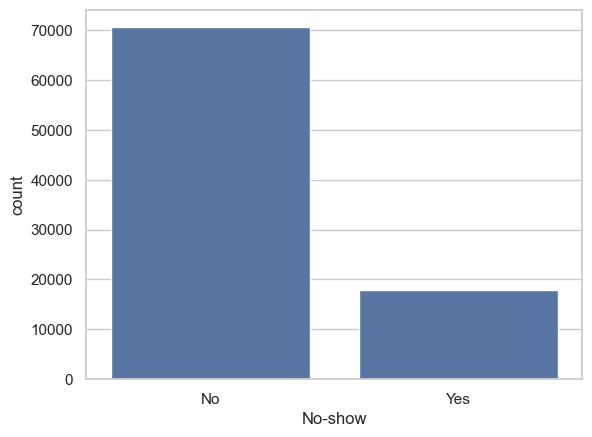

In [121]:
sns.countplot(x='No-show', data=df)

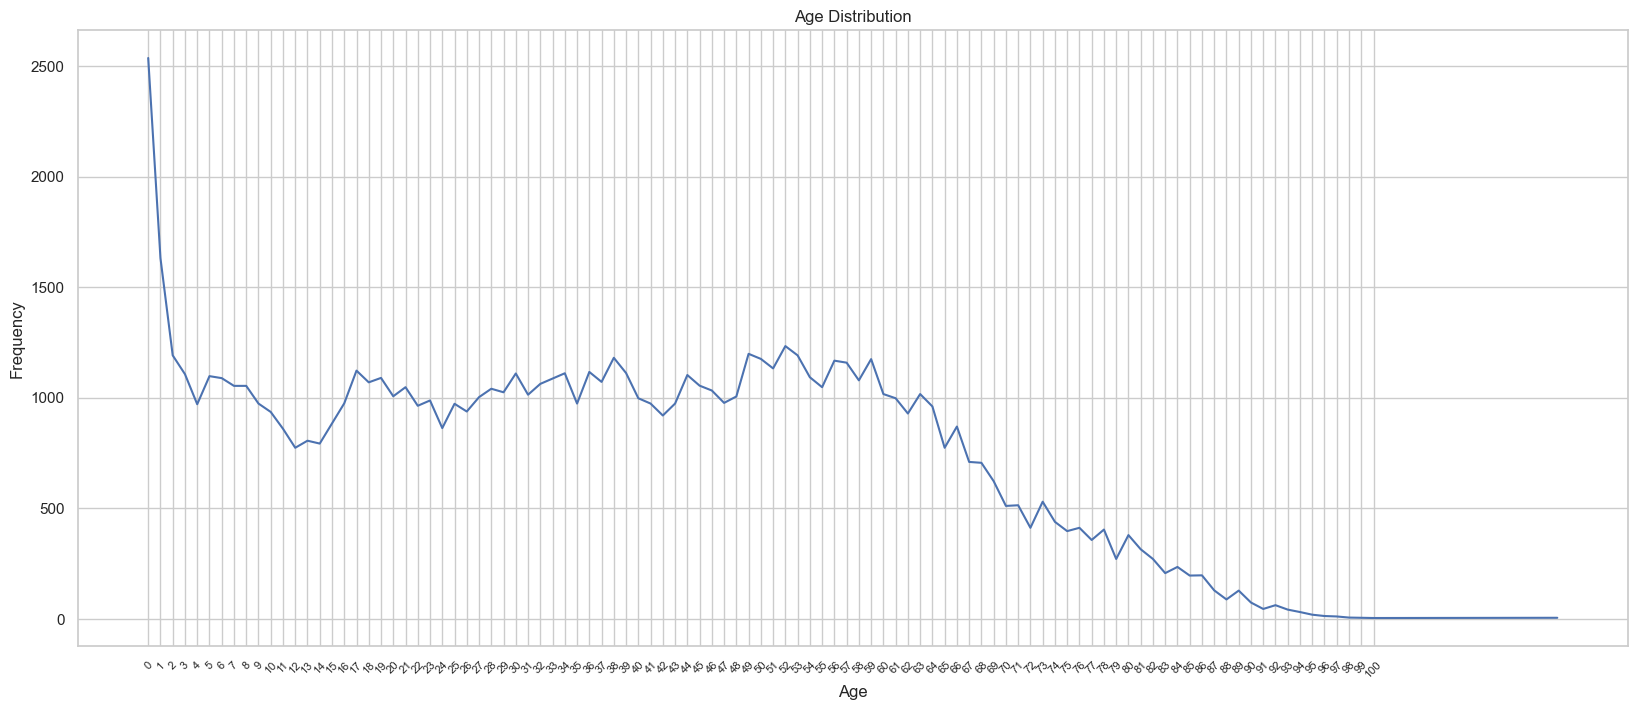

In [122]:
# Count the frequency of each age
age_counts = df['Age'].dropna().value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(20, 8))  # Adjust the size for better visibility
sns.lineplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(fontsize=8, rotation=45)
plt.xticks(range(0, 101, 1))  # Set x-axis ticks to show every age
plt.show()

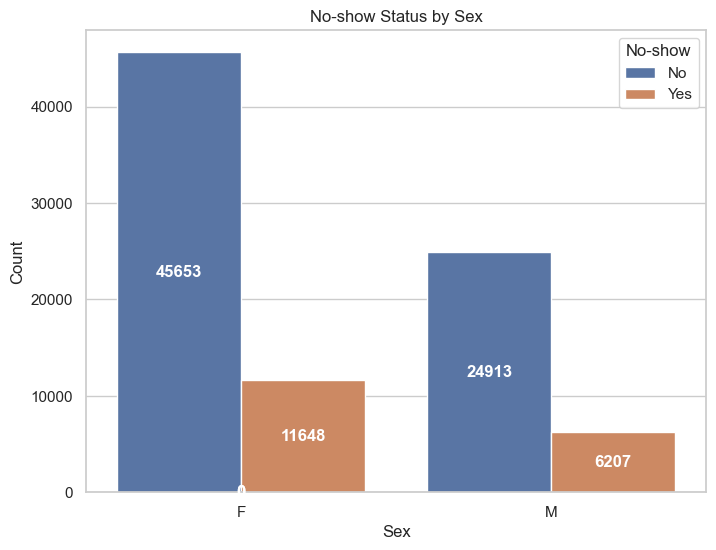

In [123]:
# Visualization of No-Shows by Sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='No-show', data=df)
plt.title('No-show Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='No-show', loc='upper right')

# Adding the count numbers inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{int(height)}',
            ha='center', va='center', color='white', fontweight='bold')

plt.show()

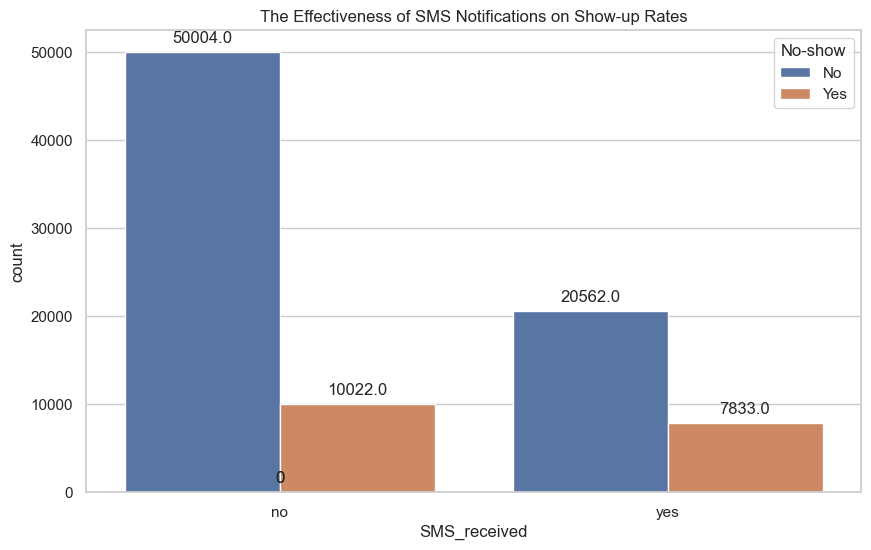

In [124]:
#Does receiving an SMS make more people show up to their appointments?

#sns.countplot(x='SMS_received', hue='No-show', data=df)
#plt.title('The Effectiveness of SMS Notifications on Show-up Rates')
#plt.xlabel('SMS Received')
#plt.ylabel('Count')

plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('The Effectiveness of SMS Notifications on Show-up Rates')

ax = plt.gca()  # Get the current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# interpretation: it doesn't make much of a difference... 
# also: no-show = 0 means the patient showed up

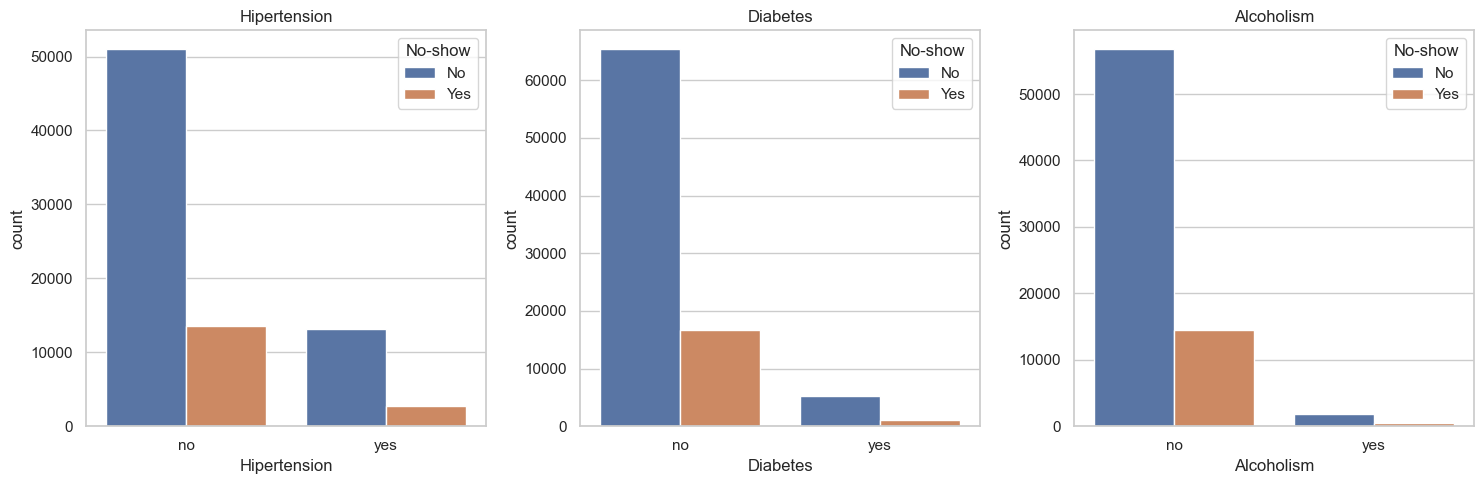

In [125]:


sns.set(style="whitegrid")  # Optional: Set the style

# Create a subplot for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust the number of columns as needed

# Plot for 'Hipertension'
sns.countplot(x='Hipertension', hue='No-show', data=df, ax=axes[0])
axes[0].set_title('Hipertension')

# Plot for 'Diabetes'
sns.countplot(x='Diabetes', hue='No-show', data=df, ax=axes[1])
axes[1].set_title('Diabetes')

# Plot for 'Alcoholism'
sns.countplot(x='Alcoholism', hue='No-show', data=df, ax=axes[2])
axes[2].set_title('Alcoholism')


plt.tight_layout()  # Optional: Adjust layout for better spacing
plt.show()

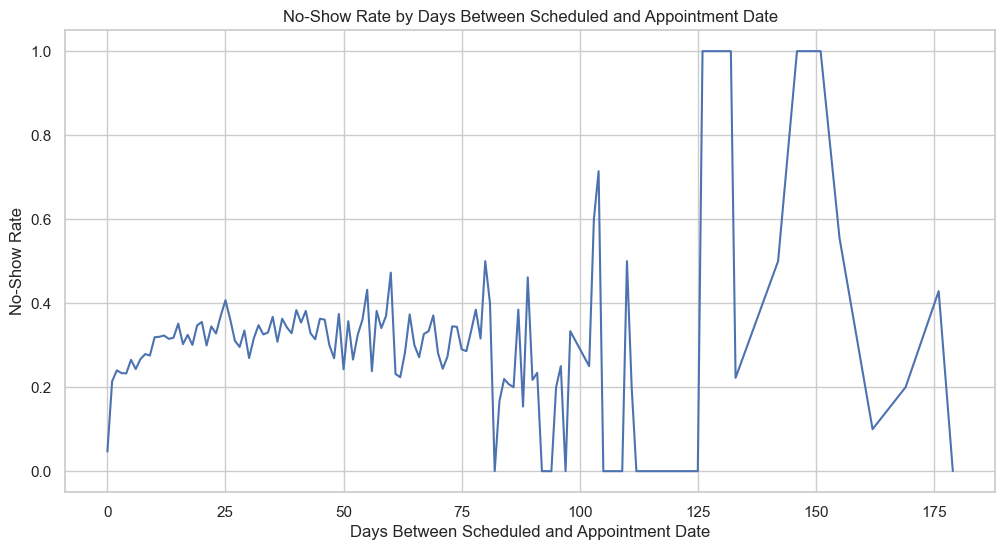

In [126]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate']).dt.date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
df['DaysBetween'] = (pd.to_datetime(df['AppointmentDate']) - pd.to_datetime(df['ScheduledDate'])).dt.days

# Remove cases where the difference is negative (errors in data)
df = df[df['DaysBetween'] >= 0]

# Group by 'DaysBetween' and calculate no-show rate
no_show_rate = df.groupby('DaysBetween')['No-show'].apply(lambda x: (x == 'Yes').mean())

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=no_show_rate.index, y=no_show_rate.values)
plt.title('No-Show Rate by Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88417 entries, 0 to 88420
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88417 non-null  float64
 1   AppointmentID    88417 non-null  int64  
 2   Sex              88417 non-null  object 
 3   ScheduledDate    88417 non-null  object 
 4   AppointmentDate  88417 non-null  object 
 5   Age              79611 non-null  float64
 6   Community        77704 non-null  object 
 7   SocialWelfare    75899 non-null  object 
 8   Hipertension     80396 non-null  object 
 9   Diabetes         88417 non-null  object 
 10  Alcoholism       73529 non-null  object 
 11  Handcap          88417 non-null  object 
 12  SMS_received     88417 non-null  object 
 13  No-show          88417 non-null  object 
 14  DaysBetween      88417 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 10.8+ MB


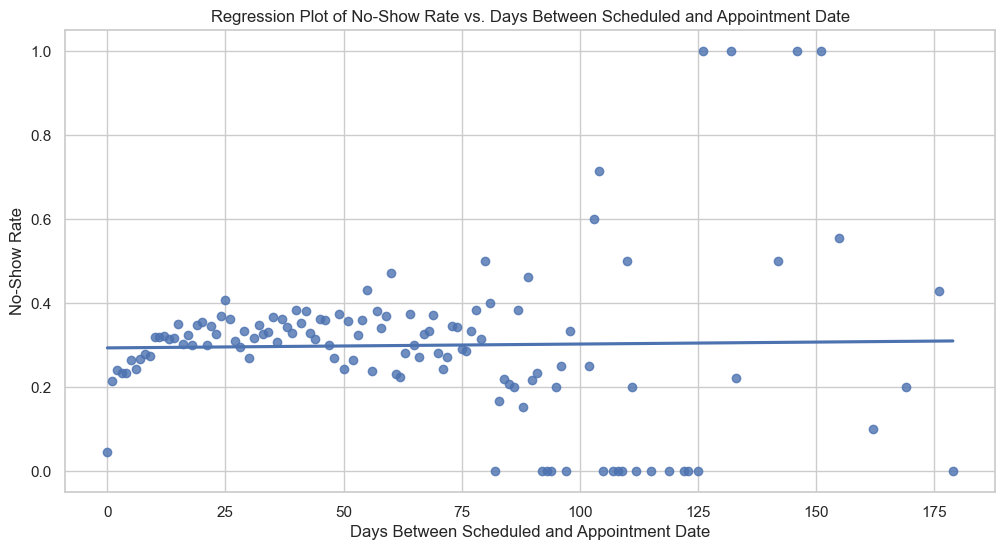

In [128]:
# Convert the no_show_rate Series to a DataFrame for easier plotting
no_show_rate_df = no_show_rate.reset_index()

# Create the regression plot
plt.figure(figsize=(12, 6))
sns.regplot(x='DaysBetween', y='No-show', data=no_show_rate_df, logistic=True, ci=None)

plt.title('Regression Plot of No-Show Rate vs. Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

Analysis of missing data missing data

In [129]:
missing_values = df.isnull().sum()

print("Total Missing Values in Each Column:")
print(missing_values)

Total Missing Values in Each Column:
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8806
Community          10713
SocialWelfare      12518
Hipertension        8021
Diabetes               0
Alcoholism         14888
Handcap                0
SMS_received           0
No-show                0
DaysBetween            0
dtype: int64


In [130]:
total_missing = df.isnull().sum().sum()

print("Total Missing Values in the Entire DataFrame:", total_missing)

Total Missing Values in the Entire DataFrame: 54946


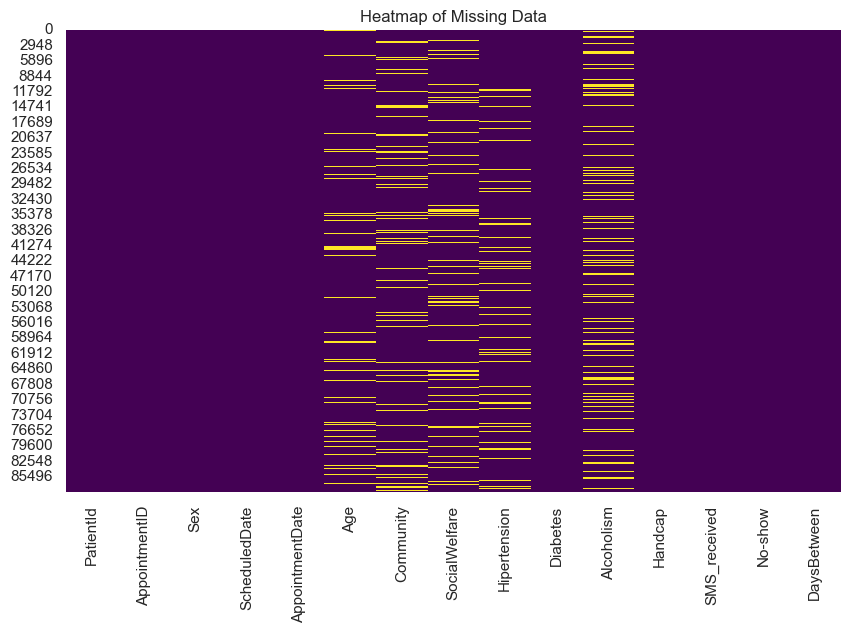

In [131]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

Data Preparation
- How and why did you select the features?
- Did you derive new features?
- How did you deal with missing data?
- How and why did you transform the data?

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88417 entries, 0 to 88420
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88417 non-null  float64
 1   AppointmentID    88417 non-null  int64  
 2   Sex              88417 non-null  object 
 3   ScheduledDate    88417 non-null  object 
 4   AppointmentDate  88417 non-null  object 
 5   Age              79611 non-null  float64
 6   Community        77704 non-null  object 
 7   SocialWelfare    75899 non-null  object 
 8   Hipertension     80396 non-null  object 
 9   Diabetes         88417 non-null  object 
 10  Alcoholism       73529 non-null  object 
 11  Handcap          88417 non-null  object 
 12  SMS_received     88417 non-null  object 
 13  No-show          88417 non-null  object 
 14  DaysBetween      88417 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 10.8+ MB


In [133]:
from scipy.stats import chi2_contingency

# Defining your columns
columns = ['SMS_received', 'Handcap', 'Alcoholism', 'Diabetes', 'Hipertension', 'SocialWelfare', 'Community', 'Sex']

# Initialize a list to store results
results = []

# Looping through columns and performing Chi-Squared tests
for column in columns:
    contingency_table = pd.crosstab(df['No-show'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((column, chi2, p))

# Printing results
for result in results:
    print(f"{result[0]}: Chi-Squared: {result[1]}, p-value: {result[2]}")

SMS_received: Chi-Squared: 1419.388543313157, p-value: 1.28610953807157e-310
Handcap: Chi-Squared: 6.683590603469788, p-value: 0.15358403919421615
Alcoholism: Chi-Squared: 0.00793475025519667, p-value: 0.9290205450914285
Diabetes: Chi-Squared: 16.65451865577708, p-value: 4.484335612387797e-05
Hipertension: Chi-Squared: 107.5274672128125, p-value: 3.4114457176530104e-25
SocialWelfare: Chi-Squared: 74.4014289087675, p-value: 6.374285063485271e-18
Community: Chi-Squared: 369.743801491314, p-value: 8.159270646628953e-39
Sex: Chi-Squared: 1.8287025081234554, p-value: 0.17628087565048528


Based on the results of your Chi-Squared tests, the decision to include or exclude features typically depends on the p-value. A common threshold for significance in many fields is 0.05, meaning that features with a p-value less than 0.05 are generally considered to have a statistically significant association with the target variable. Let's examine your results with this threshold in mind:

SMS_received:

Chi-Squared: 1419.39, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Suggests a strong association with the target variable.
Handcap:

Chi-Squared: 6.68, p-value: 0.1536
Interpretation: Not statistically significant. The association with the target is likely weak or non-existent.
Alcoholism:

Chi-Squared: 0.0079, p-value: 0.9290
Interpretation: Not statistically significant. Likely no meaningful association with the target.
Diabetes:

Chi-Squared: 16.65, p-value: 0.000045 (4.484e-05)
Interpretation: Statistically significant. Indicates an association with the target variable.
Hipertension:

Chi-Squared: 107.53, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Likely a strong association with the target variable.
SocialWelfare:

Chi-Squared: 74.40, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Indicates an association with the target variable.
Community:

Chi-Squared: 369.74, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Suggests a strong association with the target variable.
Sex:

Chi-Squared: 1.83, p-value: 0.1763
Interpretation: Not statistically significant. Likely no strong association with the target.
Recommendations:
Include: SMS_received, Diabetes, Hipertension, SocialWelfare, Community

These features show statistically significant associations with the target variable and are likely to be informative for your model.
Exclude or Reconsider: Handcap, Alcoholism, Sex

These features do not show statistically significant associations with the target variable based on the Chi-Squared test. They might not be as informative for the model. However, consider other factors such as domain knowledge, possible interactions with other features, or different encoding techniques before deciding to exclude them entirely.

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

# import the imputing function
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [135]:
features = ['Age', 'Community', 'DaysBetween', 'SMS_received', 'Hipertension', 'Diabetes', 'SocialWelfare']
num_features = ['Age', 'DaysBetween']
cat_features = ['SMS_received','Community', 'Hipertension', 'Diabetes', 'SocialWelfare']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#Target variable y is what we are trying to predict or explain. y = target variable
#defined it by extracting it from the DataFrame

In [136]:
X

,Age,Community,DaysBetween,SMS_received,Hipertension,Diabetes,SocialWelfare
0,NaN,RESISTÊNCIA,79,no,no,no,no
1,4.0,NaN,9,no,NaN,no,NaN
2,19.0,JARDIM DA PENHA,0,no,no,no,no
3,55.0,JESUS DE NAZARETH,0,no,yes,no,no
4,0.0,ITARARÉ,0,no,no,no,NaN
...,...,...,...,...,...,...,...
88416,32.0,TABUAZEIRO,3,no,no,no,no
88417,7.0,NaN,7,yes,no,no,no
88418,50.0,MARIA ORTIZ,2,no,no,no,NaN
88419,39.0,PRAIA DO SUÁ,0,no,no,no,no


In [137]:
df.columns

Index(['PatientId', 'AppointmentID', 'Sex', 'ScheduledDate', 'AppointmentDate',
       'Age', 'Community', 'SocialWelfare', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'DaysBetween'],
      dtype='object')

In [138]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent') # mode = most frequent
# Definition of imputers

In [139]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
# Definition of OneHotEncoder

In [140]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_features),
        ('cat', Pipeline(steps=[('imputer', cat_imputer),
                                ('onehot', ohe)]), cat_features)
    ]
)

In [141]:
#Dec Tree
#
#
#
#
#


from sklearn.tree import DecisionTreeClassifier

dectree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini'))
])

In [142]:
dectree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['SMS_received', 'Community',
                                                   'Hipertension', 'Diabetes',
                                                   'SocialWelfare'])])),
                ('classifier', DecisionTreeClassifier())])

In [165]:
importances = dectree_pipeline.named_steps['classifier'].feature_importances_

In [166]:
# Create a list of feature names from your preprocessor or original data
feature_names = [col for col in X.columns]  # Change this line to match your data

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Sort the features by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importances
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Community, Importance: 0.3245763327836241
Feature: Age, Importance: 0.28347023947737177
Feature: DaysBetween, Importance: 0.02351570195988382
Feature: Hipertension, Importance: 0.007312918612487103
Feature: SocialWelfare, Importance: 0.00161793855340787
Feature: Diabetes, Importance: 0.0011937405309463028
Feature: SMS_received, Importance: 5.63240940698418e-05


In [143]:
y_pred_dectree = dectree_pipeline.predict(X_test)

In [144]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [145]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['SMS_received', 'Community',
                                                   'Hipertension', 'Diabetes',
                                                   'SocialWelfare'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [146]:
y_pred_randomforest = rfc_pipeline.predict(X_test)

In [147]:
# get test-data
test_df = pd.read_csv("test.csv")

In [148]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
test_df['ScheduledDate'] = pd.to_datetime(test_df['ScheduledDate']).dt.date
test_df['AppointmentDate'] = pd.to_datetime(test_df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
test_df['DaysBetween'] = (pd.to_datetime(test_df['AppointmentDate']) - pd.to_datetime(test_df['ScheduledDate'])).dt.days

In [149]:
predictions_test_dectree = dectree_pipeline.predict(test_df)

In [150]:
predictions_test_randomforest = rfc_pipeline.predict(test_df)

In [151]:
combined_df = pd.concat([test_df, X_test])
# Here I Added DaysBetween in test_df

In [152]:
submission_dectree = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test_dectree})

In [153]:
submission_randomforest = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test_randomforest})

In [154]:
#Submission Dec Tree
#
#
#
#
#
#
filepath = 'chi2_0.3_Submission_DecTree.csv'
submission_dectree.to_csv(filepath, index=False)

In [155]:
#Submission Random Forest
#
#
#
#
#
#
filepath = 'chi2_0.3_Submission_RandomForest.csv'
submission_randomforest.to_csv(filepath, index=False)

In [156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        22106 non-null  float64
 1   AppointmentID    22106 non-null  int64  
 2   Sex              22106 non-null  object 
 3   ScheduledDate    22106 non-null  object 
 4   AppointmentDate  22106 non-null  object 
 5   Age              19955 non-null  float64
 6   Community        19461 non-null  object 
 7   SocialWelfare    19043 non-null  object 
 8   Hipertension     20089 non-null  object 
 9   Diabetes         22106 non-null  object 
 10  Alcoholism       18371 non-null  object 
 11  Handcap          22106 non-null  object 
 12  SMS_received     22106 non-null  object 
 13  DaysBetween      22106 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.4+ MB


In [157]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26526 entries, 30479 to 18273
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            23816 non-null  float64
 1   Community      23291 non-null  object 
 2   DaysBetween    26526 non-null  int64  
 3   SMS_received   26526 non-null  object 
 4   Hipertension   24172 non-null  object 
 5   Diabetes       26526 non-null  object 
 6   SocialWelfare  22792 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ MB


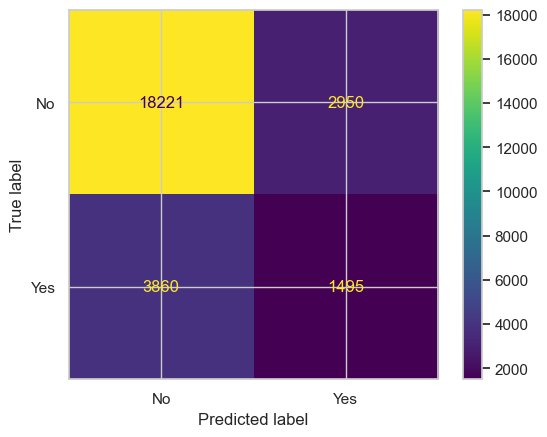

In [158]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred_dectree, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot()
plt.show()

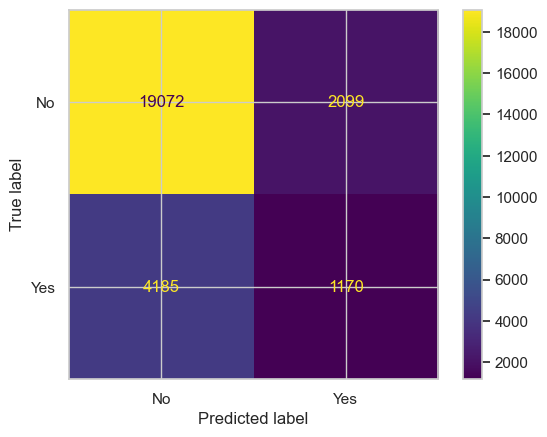

In [159]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred_randomforest, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot()
plt.show()

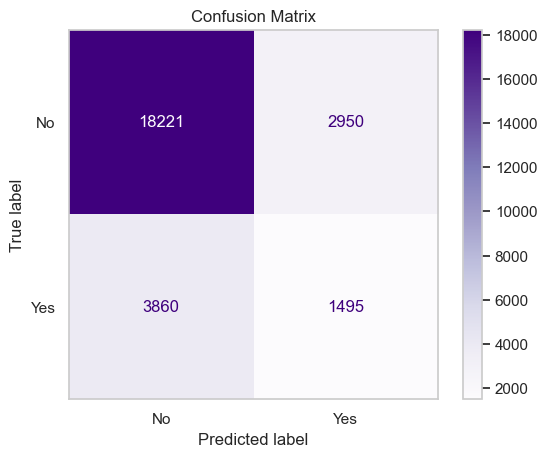

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained and tested your model and obtained predictions (y_pred, y_test)
# Replace 'rfc_pipeline' and 'classifier' with the actual names in your pipeline
class_labels = rfc_pipeline.named_steps['classifier'].classes_
display_labels = ['No', 'Yes']

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dectree, labels=class_labels)

# Display confusion matrix without grid lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Purples, include_values=True, values_format='d')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.grid(False) 
plt.show()

In [161]:
# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dectree))

              precision    recall  f1-score   support

          No       0.83      0.86      0.84     21171
         Yes       0.34      0.28      0.31      5355

    accuracy                           0.74     26526
   macro avg       0.58      0.57      0.57     26526
weighted avg       0.73      0.74      0.73     26526



In [162]:
print(classification_report(y_test, y_pred_randomforest))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86     21171
         Yes       0.36      0.22      0.27      5355

    accuracy                           0.76     26526
   macro avg       0.59      0.56      0.56     26526
weighted avg       0.73      0.76      0.74     26526



In [163]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "classifier__max_depth": range(1, 12),  #This means max dept is a hyperparameter of the classifier
    "classifier__criterion": ["gini", "entropy"]
}

In [ ]:
opt_rfc = GridSearchCV(rfc_pipeline, params, scoring="accuracy", n_jobs=-1, cv=10, verbose=1, return_train_score=True)

In [ ]:
opt_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Age',
                                                                          'DaysBetween']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Sex',
                                                                          'SMS_received',
                                                                          'Community',
                                                                          'Handcap',
                                                                          'Hipertension',
                                                                          'Diabetes',
                                                                          'Alcoholism',
                                                                          'SocialWelfare'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(1, 12)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
y_pred1 = opt_rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89     14114
         Yes       0.00      0.00      0.00      3570

    accuracy                           0.80     17684
   macro avg       0.40      0.50      0.44     17684
weighted avg       0.64      0.80      0.71     17684



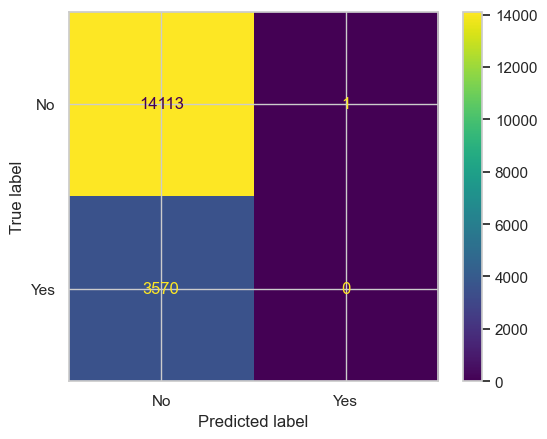

In [ ]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred1, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot()
plt.show()